In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import math
import argparse
from scipy.interpolate import UnivariateSpline
import numpy as np

import plotly.graph_objects as go
import networkx as nx

In [2]:
import networkx as nx
import numpy as np
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
import seaborn as sns

def process(G, type: str, smooth=True, xlim=None):
    # Clustering
    print(G)
    Clus = nx.average_clustering(G)
    print("Clustering:", Clus)

    if nx.is_connected(G):
        # Average distance
        ave_len = nx.average_shortest_path_length(G)
        print("Average distance:", ave_len)

        # Diameter
        Diameter = nx.diameter(G)
        print("Diameter:", Diameter)

    # Degree
    # 存储度数相应点数
    number = []
    degree = []
    for i, count in enumerate(nx.degree_histogram(G)):
        if count == 0:
            continue
        number.append(count)
        degree.append(i)

    # 作图
    sns.set_theme(style="whitegrid")  # 使用Seaborn主题
    x_new = np.linspace(min(degree), max(degree), 300)  # 生成300个点
    spl = UnivariateSpline(degree, number)  # 三次样条插值
    spl.set_smoothing_factor(3000)
    y_smooth = spl(x_new)

    fig = plt.figure(figsize=(8, 6))  # 设置图表大小
    ax1 = fig.add_subplot(111)
    ax1.set_title(type, fontsize=16, fontweight="bold")  # 标题加粗
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_ylim(1, max(number) * 1.3)
    if xlim:
        ax1.set_xlim(xlim[0], xlim[1])
    plt.xlabel("Degree", fontsize=14)  # 设置坐标轴字体
    plt.ylabel("Number", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # 散点图
    plt.scatter(degree, number, c="red", s=30, alpha=0.8, edgecolor="black", label="Original Data")
    
    # 平滑曲线
    if smooth:
        plt.plot(x_new, y_smooth, "blue", lw=2, label="Smoothed Curve")

    # 图例
    plt.legend(fontsize=12, loc="best")

    # 保存和展示
    plt.tight_layout()
    plt.savefig("./figure/" + type + "_improved.pdf", dpi=300)
    plt.show()


In [3]:
G = nx.read_edgelist('../facebook_combined.txt', delimiter=' ', nodetype=int)

Graph with 4039 nodes and 88234 edges
Clustering: 0.6055467186200876
Average distance: 3.6925068496963913
Diameter: 8


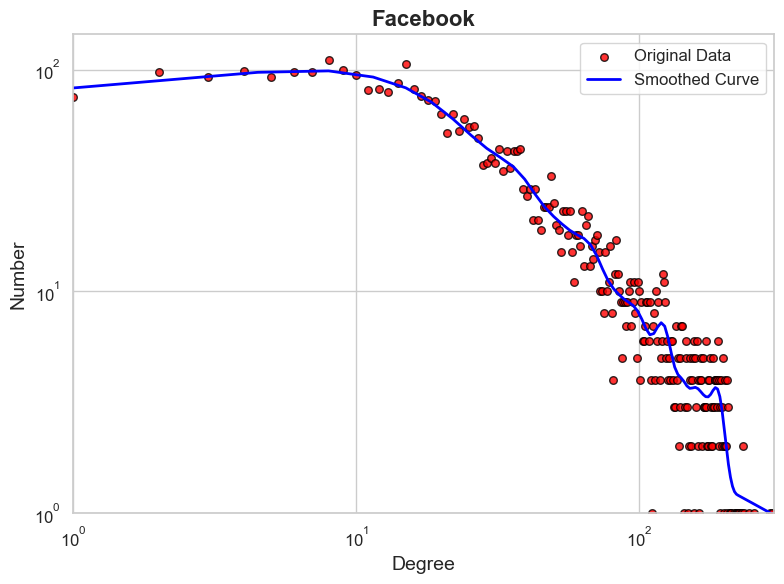

In [4]:
process(G, "Facebook", xlim=(1, 300))

Graph with 4039 nodes and 88300 edges
Clustering: 0.010873669109703775
Average distance: 2.6053949475525955
Diameter: 4


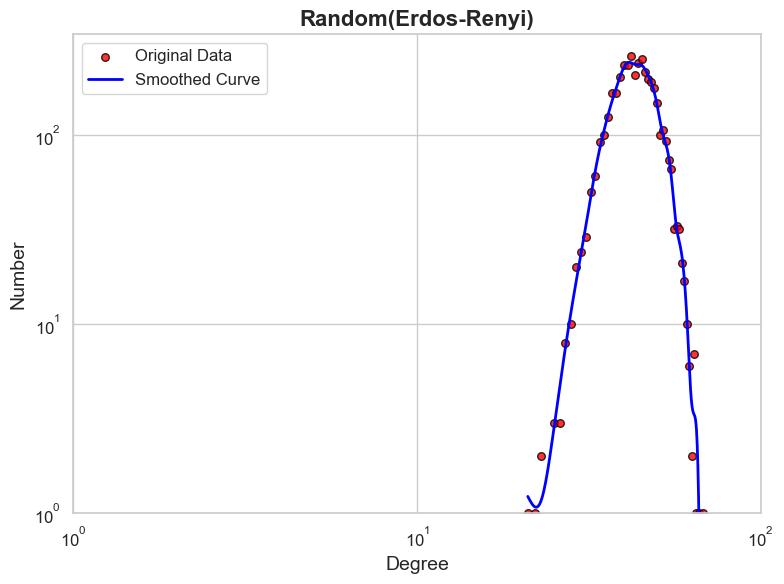

In [5]:
edge_num = 88234
node_num = 4039

p = edge_num / (node_num * (node_num - 1) / 2)
G = nx.random_graphs.erdos_renyi_graph(node_num, p)  # n, p
process(G, "Random(Erdos-Renyi)", xlim=(1, 100))

Graph with 4039 nodes and 88858 edges
Clustering: 0.7112443697178433
Average distance: 4.122707514561162
Diameter: 7


C:\Users\25173\AppData\Local\Temp\ipykernel_34408\2953476617.py:35: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spl = UnivariateSpline(degree, number)  # 三次样条插值
C:\Users\25173\AppData\Local\Temp\ipykernel_34408\2953476617.py:36: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  spl.set_smoothing_factor(3000)


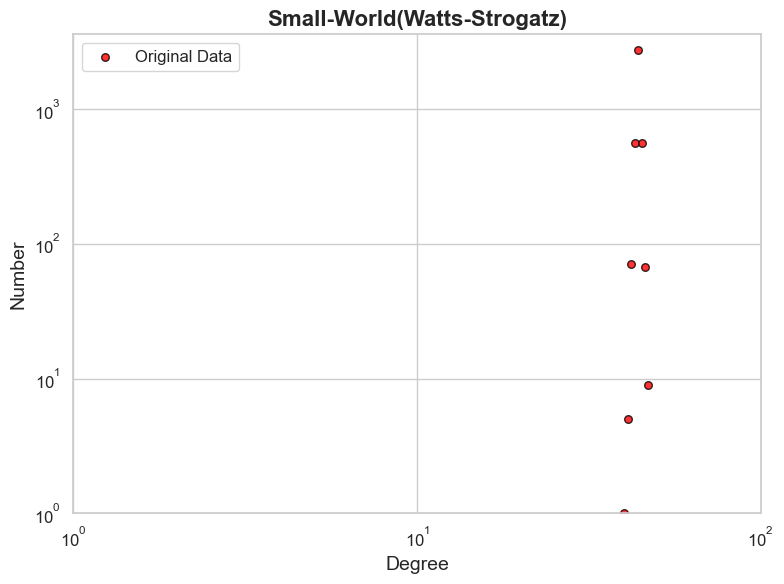

In [6]:
k = round(edge_num * 2 / node_num)
G = nx.random_graphs.watts_strogatz_graph(node_num, k, 0.01)  # n, k, p
process(G, "Small-World(Watts-Strogatz)", smooth=False, xlim=(1, 100))

Graph with 4039 nodes and 88374 edges
Clustering: 0.036685101389155456
Average distance: 2.5148790133248866
Diameter: 4


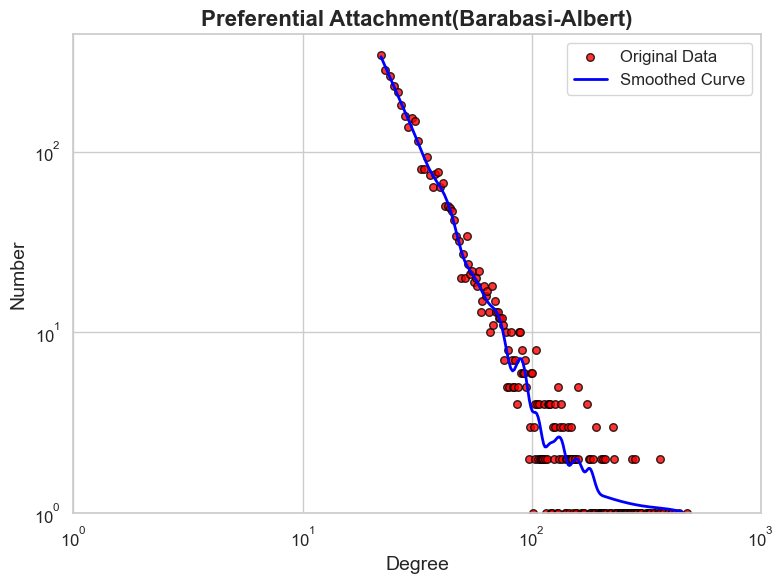

In [7]:
m = round(edge_num / node_num)
G = nx.random_graphs.barabasi_albert_graph(node_num, m)  # n, m
process(G, "Preferential Attachment(Barabasi-Albert)", xlim=(1, 1000))

## Evolution

In [8]:
n = 500
pos = nx.spring_layout(G)

for c in [2, 4, 8, 16]:
    G = nx.random_graphs.watts_strogatz_graph(n, c, 0.01)

    subG = G.subgraph(max(nx.connected_components(G),key=len))
    
    print("==========================")
    # Average degree
    ave_deg = len(G.edges())*2/n
    print("Average degree:", ave_deg)

    Clus = nx.average_clustering(subG)
    print("Clustering:", Clus)

    # Average distance
    ave_len = nx.average_shortest_path_length(subG)
    print("Average distance:", ave_len)

    # Diameter
    Diameter = nx.diameter(subG)
    print("Diameter:", Diameter)

    # Size
    size = len(subG.nodes())
    print("Size:", size)

    edge_x = []
    edge_y = []

    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')
    
    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

     # 创建节点的可视化
    node_trace = go.Scatter(
        x=node_x,
        y=node_y,
        mode='markers',
        hoverinfo='text',
        marker=dict(
            size=10,
            color="#9B59B6"  # 设置节点的颜色
        )
    )

    # 添加节点的悬浮信息
    node_text = [f'Node {node}' for node in G.nodes()]
    node_trace.text = node_text

    # 绘制图形
    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=f'c={c}',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=0, l=0, r=0, t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                    )
    
    fig.update_layout(
        plot_bgcolor='white',      # 去除绘图区背景
        paper_bgcolor='white',     # 去除整体背景
        xaxis=dict(visible=False), # 隐藏X轴
        yaxis=dict(visible=False)  # 隐藏Y轴
    )

    fig.write_image(f"./figure/c={c}.pdf", format="pdf")
    fig.show()

Average degree: 2.0
Clustering: 0.0
Average distance: 75.19533095303488
Diameter: 203
Size: 331


Average degree: 4.0
Clustering: 0.4904
Average distance: 33.66875350701403
Diameter: 83
Size: 500


Average degree: 8.0
Clustering: 0.6230793650793669
Average distance: 9.056256513026051
Diameter: 19
Size: 500


Average degree: 16.0
Clustering: 0.6767306614953662
Average distance: 4.906957915831663
Diameter: 9
Size: 500
